## The objective is to predict the probability of default for customers using credit cards  from a bank in Taiwan and classify them .

**DataSource:** UCI ML Repository 

In [58]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install plot_metric
from plot_metric.functions import BinaryClassification 
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [59]:
df=pd.read_excel("Default - credit card clients.xlsx")

In [60]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


1.Limit Balance: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

2.SEX: Gender (1 = male; 2 = female).

3.Education:  (1 = graduate school; 2 = university; 3 = high school; 4 = others).

4.Marital status: (1 = married; 2 = single; 3 = others).

5.Age:  (year).

The measurement scale for the repayment status is: 
 1. -1 = pay duly; 
 2. 1 = payment delay for one month; 
 3. 2 = payment delay for two months;
 4. 3 = payment delay for three months;
 5. 4 = payment delay for four months
 6. 5 = payment delay for five months
 7. 6 = payment delay for six months
 8. 7 = payment delay for seven months
 9. 8 = payment delay for eight months
 10. 9 = payment delay for nine months

6.PAY0 - PAY6: History of past payment.  the past monthly payment records (from April to September, 2005) as follows: 
 1.                                           PAY_0 = the repayment status in September, 2005; 
 2.                                            PAY_2 = the repayment status in August, 2005. 
 3.                                           PAY_3 =the repayment status in July, 2005. 
 4.                                           PAY_4 =the repayment status in June, 2005. 
 5.                                           PAY_5 =the repayment status in May, 2005. 
 6.                                           PAY_6 = the repayment status in April, 2005. 

7.BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar). 
   1.                                 BILL_AMT1 = amount of bill statement in September, 2005; 
   2.                                 BILL_AMT2 = amount of bill statement in August, 2005;
   3.                                 BILL_AMT3 = amount of bill statement in July, 2005
   4.                                 BILL_AMT4 = amount of bill statement in June, 2005;
   5.                                 BILL_AMT5 = amount of bill statement in May, 2005;
   6.                                 BILL_AMT6 = amount of bill statement in April, 2005;

8.PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 
  1.                        PAY_AMT1 = amount paid in September, 2005; 
  2.                        PAY_AMT2 = amount paid in August, 2005;
  3.                        PAY_AMT3 = amount paid in July, 2005
  4.                        PAY_AMT4 = amount paid in June, 2005;
  5.                        PAY_AMT5 = amount paid in May, 2005;
  6.                        PAY_AMT6 = amount paid in April, 2005;

<a id="summary"></a>
## Exploratory Data Analysis

<a id="summary"></a>
## Univariate Analysis

In [61]:
df.shape ##check the shape of the dataset

(30000, 25)

The dataset has 30000 rows and 25 columns

In [62]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [63]:
df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2
1,2,120000,2,2,2,26,-1,2,0,0,0,2
2,3,90000,2,2,2,34,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1


In [64]:
 df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',"BILL_AMT6"]].describe().round(2)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76
std,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
25%,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00
50%,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
75%,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25
max,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00


In [65]:
df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']].describe().round(2)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Looks like the amount to be paid and amount to be billed are different for different csutomers as the amount balance would be varying as per the customer.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

there are no null values to be removed in the dataset

In [67]:
#assign the data to another variable and drop the column "ID"
df_eda=df
df_eda.drop(columns="ID",inplace=True)

In [68]:
#replacing all the values with string values to get a better understanding while analyzing the data
df_eda['MARRIAGE'].replace({0:"Others",1:"Married",2:"Single",3:"Others"},inplace=True)

df_eda['EDUCATION'].replace({6:"Others",1:"Graduate School",2:"University",3:"High School",4:"Others",5:"Others",0:"Others"},inplace=True)

df_eda['SEX'].replace({1:"Men",2:"Women"},inplace=True)
dict1={"PAY_0":"April","PAY_2":"May","PAY_3":"June","PAY_4":"July","PAY_5":"August","PAY_6":"September"}
df_eda.rename(columns = dict1, inplace = True)

df_eda.rename(columns = {'BILL_AMT1':'BA_April','BILL_AMT2':"BA_May",'BILL_AMT3':"BA_June",'BILL_AMT4':"BA_July",'BILL_AMT5':"BA_August","BILL_AMT6":"BA_September"}, inplace = True)

df_eda['default payment next month'].replace({0:"Not defaulted",1:"Defaulted"},inplace=True)

s={'PAY_AMT1':'PA_April','PAY_AMT2':"PA_May",'PAY_AMT3':"PA_June",'PAY_AMT4':"PA_July",'PAY_AMT5':"PA_August","PAY_AMT6":"PA_September"}
df_eda.rename(columns=s,inplace=True)

Following replacements have been made above for better understanding of the data:
*  For marriage: Replace  0,3 as "Others" ,  1 as "Married"  , 2 as "Single".
*  For education: Replace 1.6,4,0 as "Others , 2. 1 as "Graduate School"  , 2 as "University"  , 3 as "High School".
*  For SEX: Replace 1 as "Men" and 2 as "Women".
*  For default payment next month Replaced 0 as "Not Defaulted" , 1 as "Defaulted".

In [135]:
#create a function to return the percentage values from the whole value after grouping by the data
def per_value(data_frame):
    per_val=list()
    col=dict()
    for i in range(0,data_frame.shape[0]):
        value=str(((data_frame.iloc[i,0]/data_frame.iloc[:,0].sum())*100).round(2))+"%"
        per_val.append(value)
    data_frame["Percentage of Total"]=np.array(per_val)
    return data_frame

def per_value2(df):
    df_list=list()
    final_df=pd.DataFrame()
    for i in np.arange(0,df.shape[0],2):
        df_list.append(per_value(df.iloc[i:i+2]))
    final_df=pd.concat(df_list,axis=0)
    return final_df

def per_valuei(df,j):
    df_list=list()
    final_df=pd.DataFrame()
    for i in np.arange(0,df.shape[0],j):
        df_list.append(per_value(df.iloc[i:i+j]))
    final_df=pd.concat(df_list,axis=0)
    return final_df

In [70]:
# check the column values if they are replaced correctly or not
df_eda.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,April,May,June,July,August,...,BA_July,BA_August,BA_September,PA_April,PA_May,PA_June,PA_July,PA_August,PA_September,default payment next month
0,20000,Women,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Defaulted
1,120000,Women,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Defaulted
2,90000,Women,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,Not defaulted
3,50000,Women,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,Not defaulted
4,50000,Men,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,Not defaulted


**Marriage**

In [71]:
c=pd.DataFrame(df_eda['MARRIAGE'].value_counts())
per_value(c)

,MARRIAGE,Percentage of Total
Single,15964,53.21%
Married,13659,45.53%
Others,377,1.26%


<AxesSubplot:>

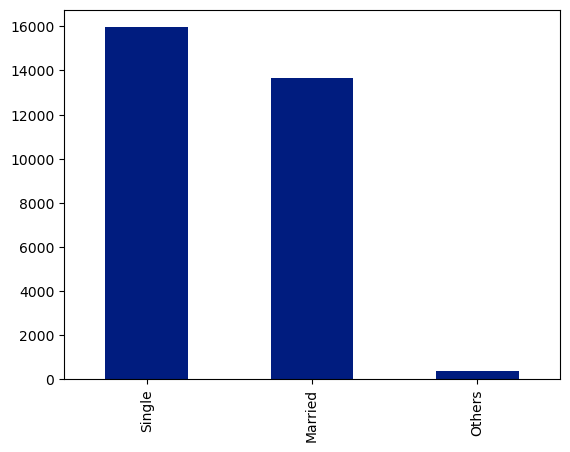

In [72]:
df_eda['MARRIAGE'].value_counts().plot(kind="bar")

There are more number of single and unmarried people when compared to other martial status.there is another value present which is 0 . to prevent the loss of info we can convert it to 3 which represents ther martial status

**Education**

In [73]:
edu=pd.DataFrame(df_eda['EDUCATION'].value_counts())
per_value(edu)

,EDUCATION,Percentage of Total
University,14030,46.77%
Graduate School,10585,35.28%
High School,4917,16.39%
Others,468,1.56%


0,5,6 are unknown so we can include them with 4 which is others

<AxesSubplot:>

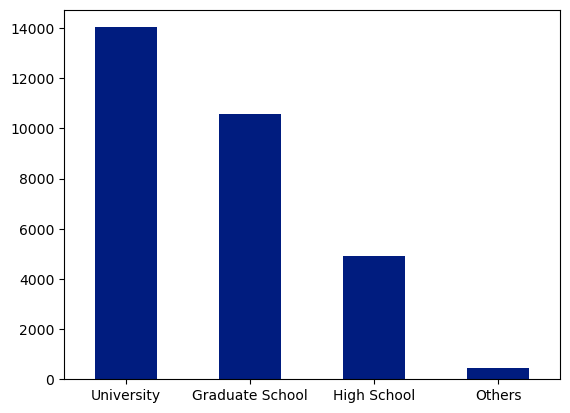

In [74]:
df_eda["EDUCATION"].value_counts().plot(kind='bar',rot=0)

**Gender**

In [75]:
gen=pd.DataFrame(df_eda['SEX'].value_counts())

per_value(gen)

,SEX,Percentage of Total
Women,18112,60.37%
Men,11888,39.63%


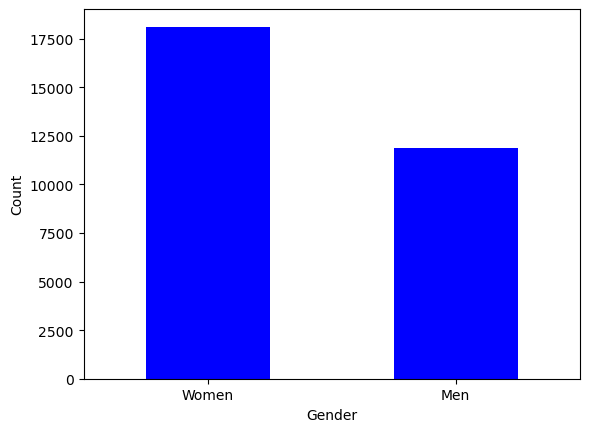

In [76]:
fig, ax = plt.subplots()
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
df_eda['SEX'].value_counts().plot(kind='bar',rot=0,color="b")
plt.show()

there are around 5000 more Women than Men

**Age**

<AxesSubplot:title={'center':'Density plot of Age'}, xlabel='AGE', ylabel='Density'>

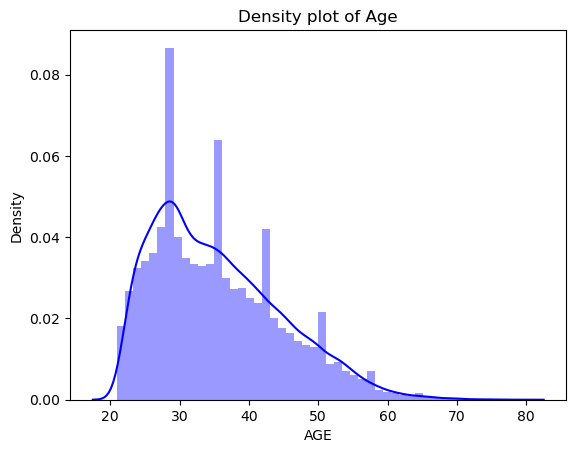

In [77]:
fig, ax = plt.subplots()
ax.set_title("Density plot of Age")
sns.distplot(df_eda['AGE'], hist=True,color="b")

The distribution is skewed towards the right direction.There are more number of people having age lying between 25 and 32 . The density decreases as the age increases. 

**PayStatus over the past months:**

In [78]:
a=pd.DataFrame(df_eda[["April"]].value_counts(),columns=["April"])
b=pd.DataFrame(df_eda[["May"]].value_counts(),columns=["May"])
c=pd.DataFrame(df_eda[["June"]].value_counts(),columns=["June"])
d=pd.DataFrame(df_eda[["July"]].value_counts(),columns=["July"])
e=pd.DataFrame(df_eda[["August"]].value_counts(),columns=["August"])
f=pd.DataFrame(df_eda[["September"]].value_counts(),columns=["September"])
g=df[["default payment next month"]]
Paystatus=pd.concat([a,b,c,d,e,f],axis=1)
Paystatus

,April,May,June,July,August,September
0,14737,15730,15764,16455,16947.0,16286.0
-1,5686,6050,5938,5687,5539.0,5740.0
1,3688,28,4,2,NaN,NaN
-2,2759,3782,4085,4348,4546.0,4895.0
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
8,19,1,3,2,1.0,2.0
6,11,12,23,5,4.0,19.0


the Pay status is given here as 0 and -2 . It is an unxplained number here. But there are more number of data present to it,


1. The payment status for all the months seems to from a pattern . their card status has no payment to pay and 25 to 30% 
of customers have paid duly.
2. For all the months the 50% of the card holders have paid the payment in duly.
3. Very less people have delayed to pay post 3 months time period
One thing is that from may to september there is very less people who have dealyed for 1 month but the numbers spike for delay in 
2 months. 

<Figure size 2000x1000 with 0 Axes>

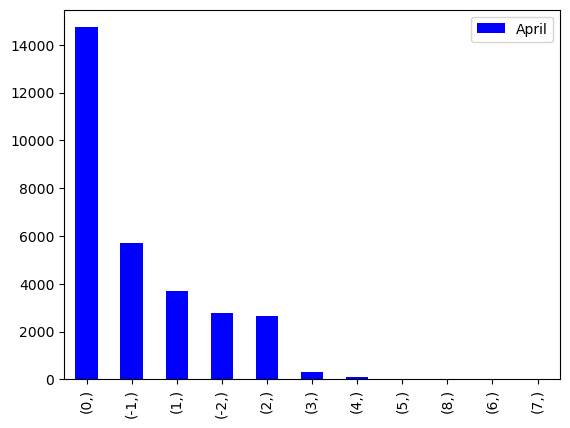

None


<Figure size 2000x1000 with 0 Axes>

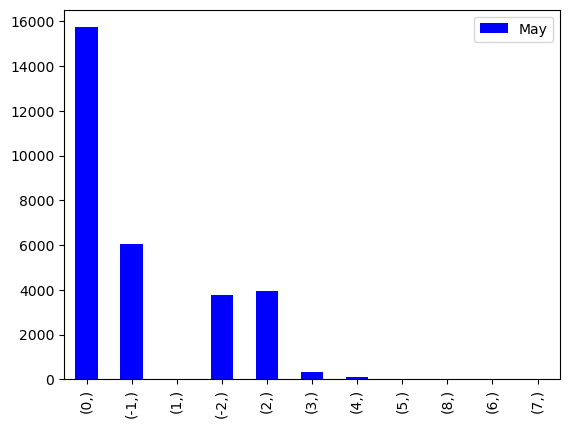

None


<Figure size 2000x1000 with 0 Axes>

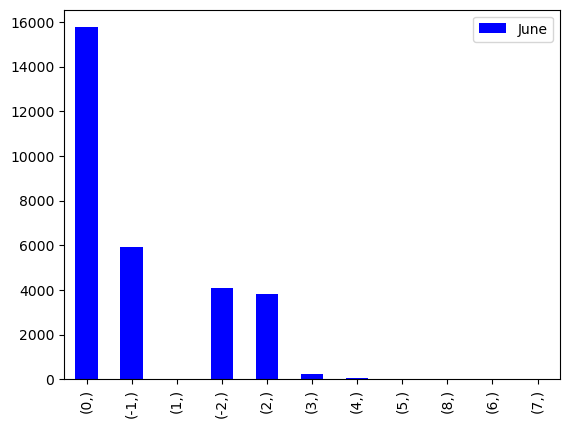

None


<Figure size 2000x1000 with 0 Axes>

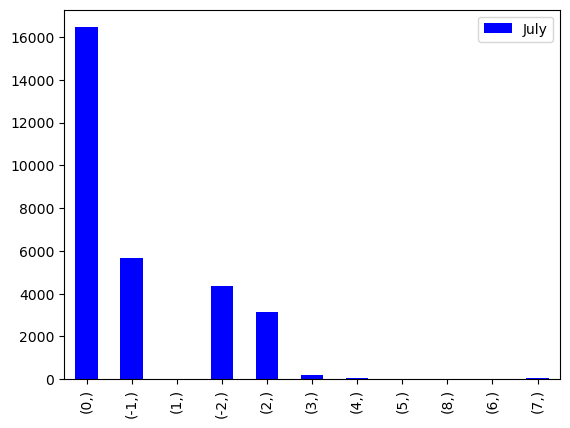

None


<Figure size 2000x1000 with 0 Axes>

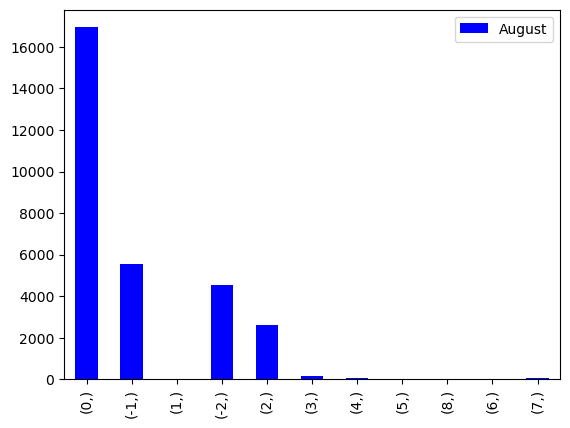

None


<Figure size 2000x1000 with 0 Axes>

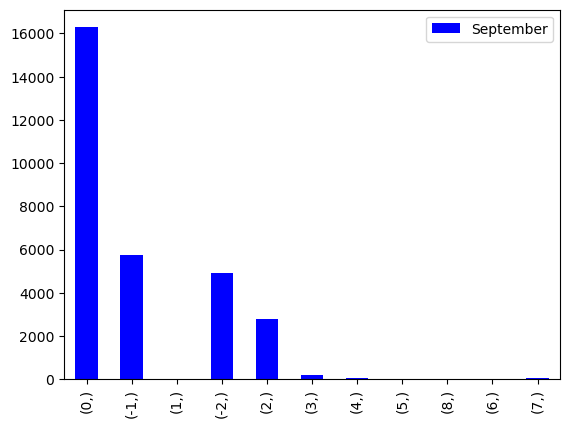

None


In [79]:
for i in range(0,6): 
    plt.figure(figsize=(20,10))
    Paystatus.plot(y=[Paystatus.columns[i]],kind="bar", use_index=True,color="b")
    print(plt.show())

**Bill Amount for six months**

In [80]:
# Lets look at the bill amount and how its varying accross the six months

<AxesSubplot:ylabel='Density'>

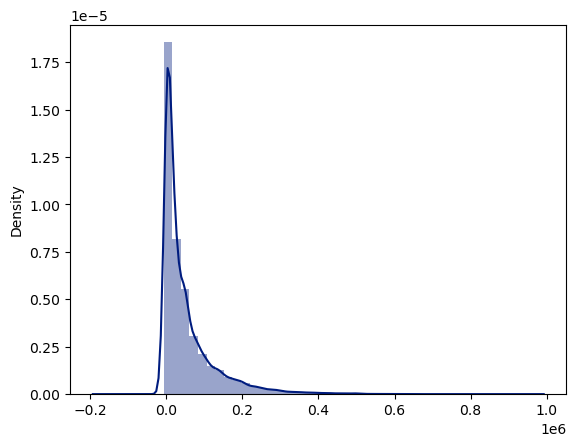

In [81]:
sns.distplot(df_eda, x=df_eda['BA_April'])

<AxesSubplot:ylabel='Density'>

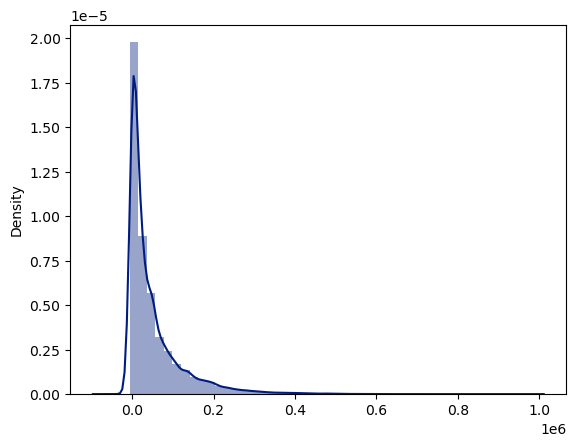

In [82]:
sns.distplot(df_eda, x=df_eda['BA_May'])

<AxesSubplot:ylabel='Density'>

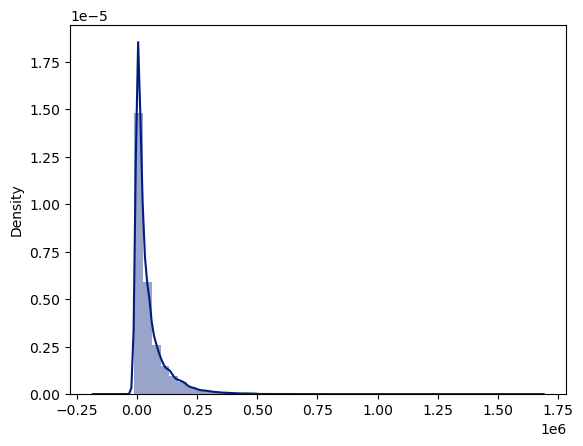

In [83]:
sns.distplot(df_eda, x=df_eda['BA_June'])

<AxesSubplot:ylabel='Density'>

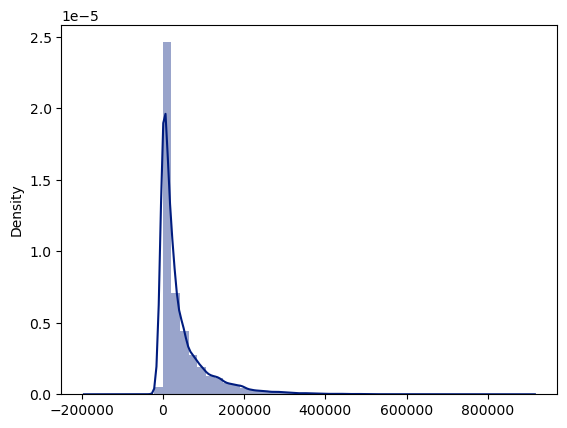

In [84]:
sns.distplot(df_eda, x=df_eda['BA_July'])

<AxesSubplot:ylabel='Density'>

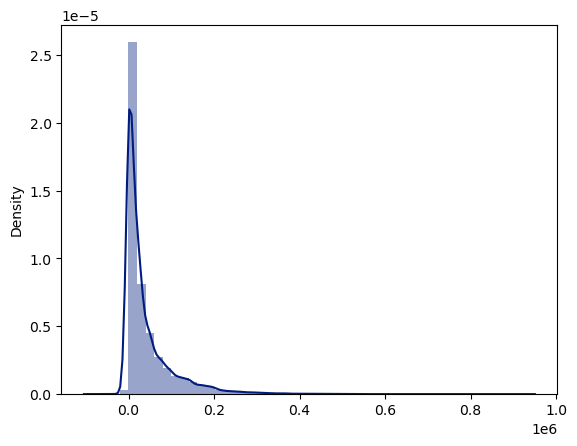

In [85]:
sns.distplot(df_eda, x=df_eda['BA_August'])

<AxesSubplot:ylabel='Density'>

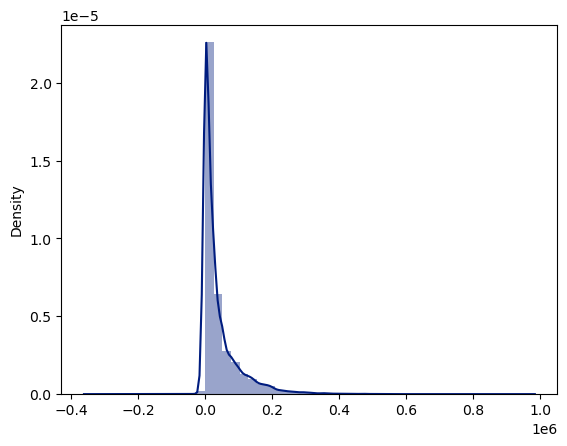

In [86]:
sns.distplot(df_eda, x=df_eda['BA_September'])

The bill amount value for all the months are skewed towards the left . There is a high concentration of values at 0 and the values are slowly dropping as the bill amount increases. this shows that most people tend to have had bill amounts 0 and 130000.
Post this the count of people having bill amount decreased as the amount increased.

<AxesSubplot:ylabel='Density'>

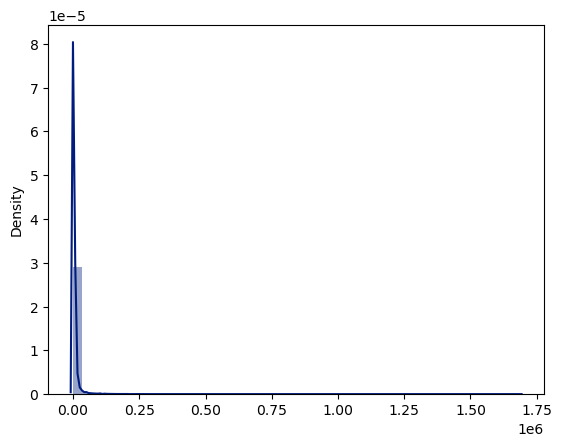

In [87]:
sns.distplot(df_eda, x=df_eda['PA_May'])

**Pay amount for six months**

<AxesSubplot:ylabel='Density'>

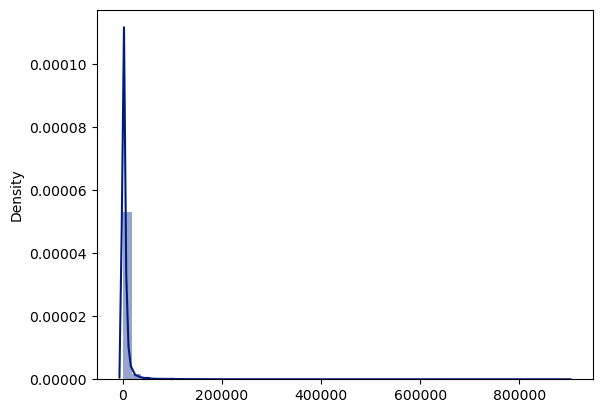

In [88]:
sns.distplot(df_eda, x=df_eda['PA_June'])

<AxesSubplot:ylabel='Density'>

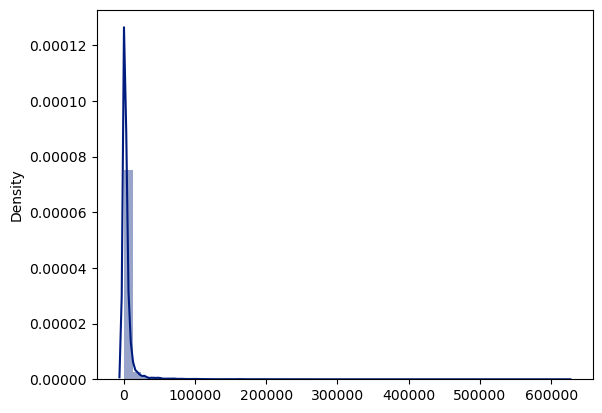

In [89]:
sns.distplot(df_eda, x=df_eda['PA_July'])

<AxesSubplot:ylabel='Density'>

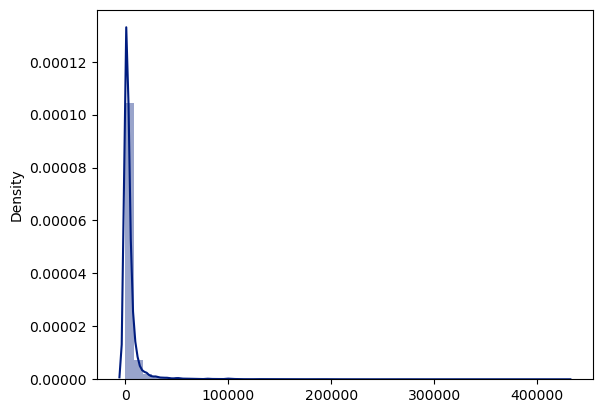

In [90]:
sns.distplot(df_eda, x=df_eda['PA_August'])

<AxesSubplot:ylabel='Density'>

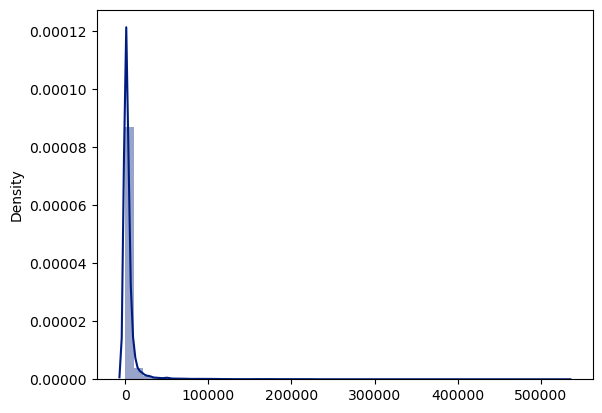

In [91]:
sns.distplot(df_eda, x=df_eda['PA_September'])

The payment amount for all the six months also tends to be left skewed for the data.most of the amount paid by the people is ranging between 0 to 25k and post that the distribution is very minimal 

**Default Payment next month**

AxesSubplot(0.125,0.11;0.775x0.77)


NameError: name 'per_value' is not defined

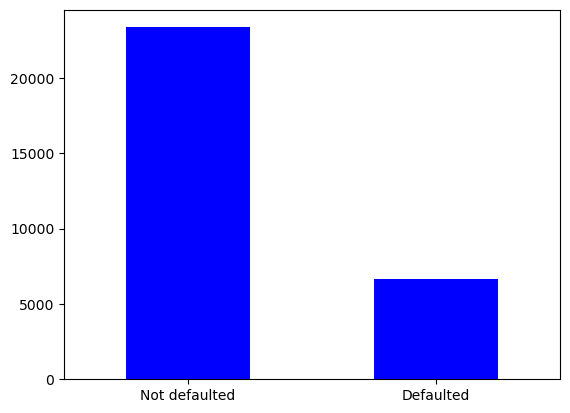

In [57]:

print(df_eda["default payment next month"].value_counts().plot(kind='bar',rot=0,color="b"))
default=pd.DataFrame(df_eda["default payment next month"].value_counts())
per_value(default)

22% of the people have defaulted . Most of the people have not defaulted .

**Multivariate Analysis**

Here I have taken the individual variables and analyzed it with the target variable .


 ## Limit Balance

Let's see if there is any variation in the limit balances for people who hace

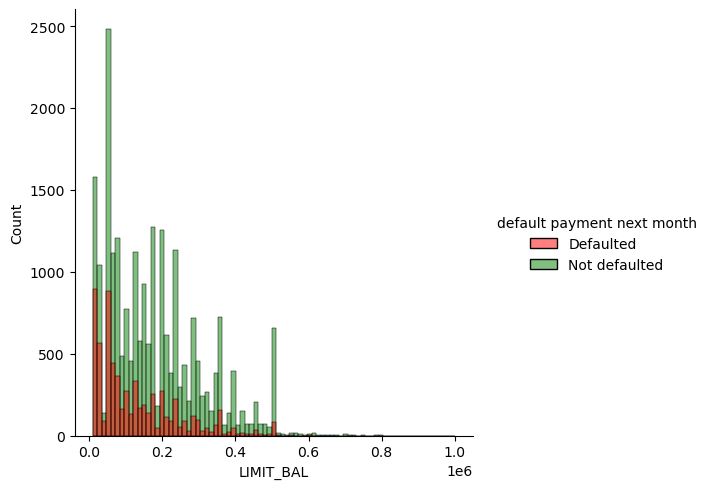

In [113]:
palette = sns.color_palette(["red","green"])
sns.displot(df_eda, x=df_eda["LIMIT_BAL"], hue="default payment next month",palette=palette)

There is no relation with default and limit balance as the people who default are scattered accross different levels of credit limit balance

## Gender

<AxesSubplot:xlabel='SEX', ylabel='count'>

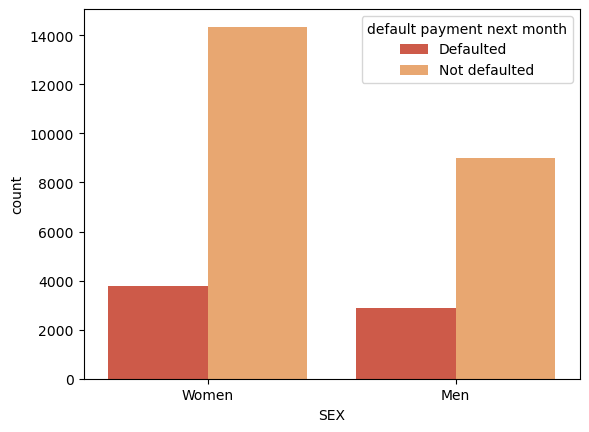

In [53]:
palette = sns.color_palette("RdYlBu")

sns.countplot(x = df_eda["SEX"], hue = 'default payment next month', data = df_eda, palette=palette)

In [114]:
df_eda['default payment next month'].replace({0:"Not defaulted",1:"Defaulted"},inplace=True)

default_pay=pd.DataFrame(df_eda['default payment next month'].groupby(df_eda['SEX']).value_counts())


In [115]:
per_value2(default_pay)

default payment next month  \
SEX   default payment next month                               
Men   Not defaulted                                     9015   
      Defaulted                                         2873   
Women Not defaulted                                    14349   
      Defaulted                                         3763   

                                 Percentage of Total  
SEX   default payment next month                      
Men   Not defaulted                           75.83%  
      Defaulted                               24.17%  
Women Not defaulted                           79.22%  
      Defaulted                               20.78%

Relatively same %of people defaulted among men and women . while the proportion of men who defaulted is higher , the  higher value counts tend to slide towards women

## Education

Here we can see how the People defaulting and their educational levels are varying

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

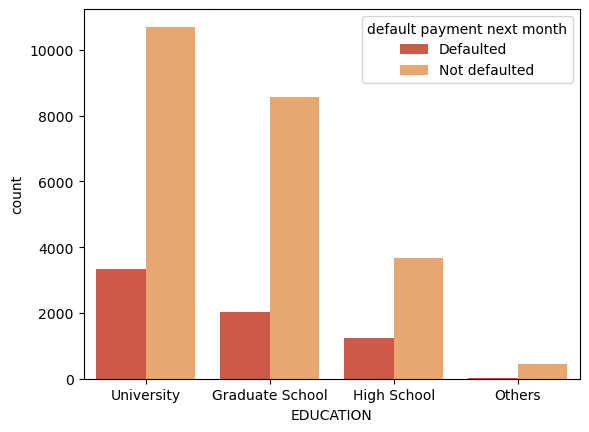

In [117]:
palette = sns.color_palette("RdYlBu")

sns.countplot(x = df_eda["EDUCATION"], hue = 'default payment next month', data = df_eda, palette=palette)

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

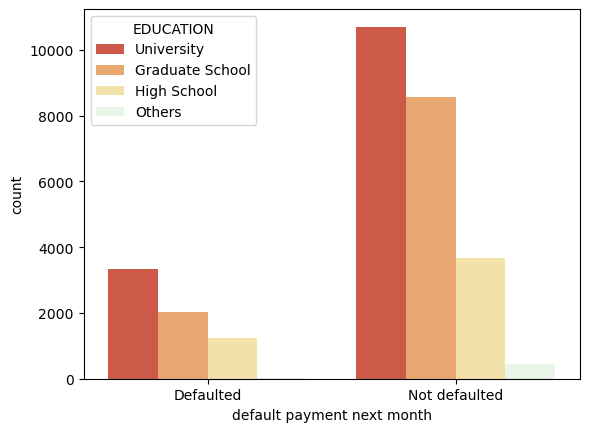

In [119]:
palette = sns.color_palette("RdYlBu")
sns.countplot(x = df_eda["default payment next month"], hue = 'EDUCATION', data = df_eda,palette=palette)

The proportion of people who default seemed to be slightly higher for high school educated people.Let's find the count and percentage of it.

In [121]:
edu=pd.DataFrame(df_eda['default payment next month'].groupby(df_eda['EDUCATION']).value_counts())
per_value2(edu)

default payment next month  \
EDUCATION       default payment next month                               
Graduate School Not defaulted                                     8549   
                Defaulted                                         2036   
High School     Not defaulted                                     3680   
                Defaulted                                         1237   
Others          Not defaulted                                      435   
                Defaulted                                           33   
University      Not defaulted                                    10700   
                Defaulted                                         3330   

                                           Percentage of Total  
EDUCATION       default payment next month                      
Graduate School Not defaulted                           80.77%  
                Defaulted                               19.23%  
High School     Not defaulted                           74.84%  
                Defaulted                               25.16%  
Others          Not defaulted                           92.95%  
                Defaulted                                7.05%  
University      Not defaulted                           76.27%  
                Defaulted                               23.73%

As seen from the vizuals there is a slightly higher % of people who have defaulted from those who had only high school education.And relatively same percentage of people defaulted from all educational levels. Even though other education levels are the lowest we can't say anything about it since we don't know how many educational levels it contains.

# MARRIAGE

See if there is any relation between martial status and default

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

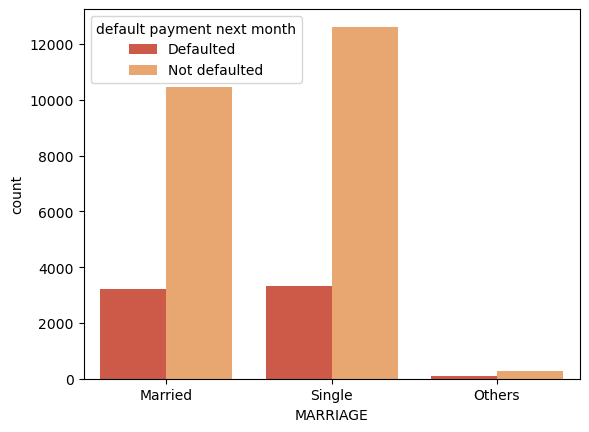

In [128]:
palette = sns.color_palette("RdYlBu")
sns.countplot(x = df_eda["MARRIAGE"], hue = 'default payment next month', data = df_eda,palette=palette)

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

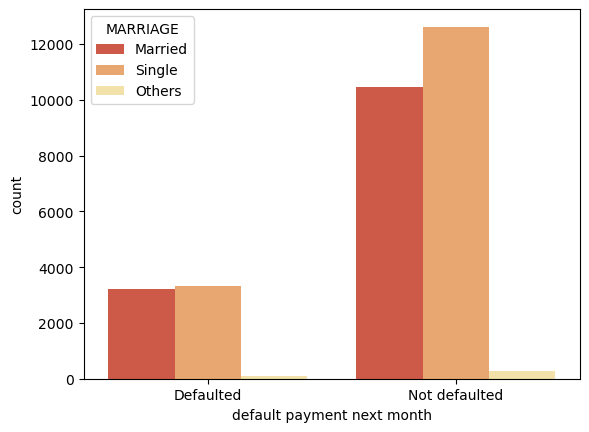

In [129]:
palette = sns.color_palette("RdYlBu")
sns.countplot(x = df_eda["default payment next month"], hue = 'MARRIAGE', data = df_eda,palette=palette)

In [127]:
mar=pd.DataFrame(df_eda['default payment next month'].groupby(df_eda['MARRIAGE']).value_counts())
per_value2(mar)

default payment next month  \
MARRIAGE default payment next month                               
Married  Not defaulted                                    10453   
         Defaulted                                         3206   
Others   Not defaulted                                      288   
         Defaulted                                           89   
Single   Not defaulted                                    12623   
         Defaulted                                         3341   

                                    Percentage of Total  
MARRIAGE default payment next month                      
Married  Not defaulted                           76.53%  
         Defaulted                               23.47%  
Others   Not defaulted                           76.39%  
         Defaulted                               23.61%  
Single   Not defaulted                           79.07%  
         Defaulted                               20.93%

People of all martial statuses have similar probability of default.

## Age

In [ ]:
 sns.displot(df_eda, x=df_eda["AGE"], hue="default payment next month")

The probability of default seems to be left skewed similar to the distribution of age.**But as the age of people increases there is less people in our data having credit card and also the probability of default is higher as age increases**. People in their early 20's are also having higher probability of default.

# PayStatus over Months

In [ ]:
Paystatus

As we have seen from the above table, we do not have much info regarding the pay status for all 6 months when the payment is due for 1 month. so we can see the paystatus for differnet months and the proportion of people defaulting for different pay status accross months.

In [ ]:
Paystatus

In [ ]:

sns.countplot(x = df_eda["April"], hue = 'default payment next month', data = df_eda)

In [ ]:

sns.countplot(x = df_eda["May"], hue = 'default payment next month', data = df_eda)

In [ ]:
sns.countplot(x = df_eda["June"], hue = 'default payment next month', data = df_eda)

In [ ]:
sns.countplot(x = df_eda["July"], hue = 'default payment next month', data = df_eda)

In [ ]:
sns.countplot(x = df_eda["August"], hue = 'default payment next month', data = df_eda)

In [ ]:
sns.countplot(x = df_eda["September"], hue = 'default payment next month', data = df_eda)

since we do not have much info regarding paystatus and duly 1 month we can't say anything regarding it. But if we look at pay delay for two months and above for all the months , more number of people defaulted if people delayed payment of bill for a month beyond 2 months

# Bill amount over the months 

In [ ]:
dr={'BILL_AMT1':'BA_April','BILL_AMT2':"BA_May",'BILL_AMT3':"BA_June",'BILL_AMT4':"BA_July",'BILL_AMT5':"BA_August","BILL_AMT6":"BA_September"}
df_eda.rename(columns =dr, inplace = True)

In [ ]:
sns.displot(df_eda, x=df_eda["BA_April"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["BA_May"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["BA_June"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["BA_July"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["BA_August"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["BA_September"], hue="default payment next month")

The bill amount for people tends to be left skewed along with the proportion of people defaulting. the bill amounts tend to 
stay within the limit of 0 to 200K.

## Amount paid over Months

In [ ]:
sns.displot(df_eda, x=df_eda["PA_April"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["PA_May"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["PA_July"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["PA_August"], hue="default payment next month")

In [ ]:
sns.displot(df_eda, x=df_eda["PA_September"], hue="default payment next month")

The Payment amount is left skewed for all the months

**Analyzing the data by taking only the defaulted rows**

**Gender:**

In [130]:
subset=df_eda["default payment next month"]=="Defaulted"
df_daf=df_eda[subset]
per_value(pd.DataFrame(df_daf['default payment next month'].groupby(df_eda['SEX']).value_counts()))

,,default payment next month,Percentage of Total
SEX,default payment next month,,
Men,Defaulted,2873,43.29%
Women,Defaulted,3763,56.71%


In [57]:
per_value(pd.DataFrame(df_daf['default payment next month'].groupby(df_eda['EDUCATION']).value_counts()))

,,default payment next month,Percentage of Total
EDUCATION,default payment next month,,
Graduate School,Defaulted,2036,30.68%
High School,Defaulted,1237,18.64%
Others,Defaulted,33,0.5%
University,Defaulted,3330,50.18%


Half of the people who defaulted have the education level at their university.

**Marriage**

In [58]:
per_value(pd.DataFrame(df_daf['default payment next month'].groupby(df_eda['MARRIAGE']).value_counts()))

,,default payment next month,Percentage of Total
MARRIAGE,default payment next month,,
Married,Defaulted,3206,48.31%
Others,Defaulted,89,1.34%
Single,Defaulted,3341,50.35%


**Marriage and Gender**

In [134]:
per_value2(pd.DataFrame(df_daf['default payment next month'].groupby([df_eda['MARRIAGE'],df_eda['SEX']]).value_counts()))

default payment next month  \
MARRIAGE SEX   default payment next month                               
Married  Men   Defaulted                                         1346   
         Women Defaulted                                         1860   
Others   Men   Defaulted                                           42   
         Women Defaulted                                           47   
Single   Men   Defaulted                                         1485   
         Women Defaulted                                         1856   

                                          Percentage of Total  
MARRIAGE SEX   default payment next month                      
Married  Men   Defaulted                               41.98%  
         Women Defaulted                               58.02%  
Others   Men   Defaulted                               47.19%  
         Women Defaulted                               52.81%  
Single   Men   Defaulted                               44.45%  
         Women Defaulted                               55.55%

Irrespective of martial status men and women are equeally likely of defaulting

In [61]:
per_value2(pd.DataFrame(df_daf['default payment next month'].groupby([df_eda['EDUCATION'],df_eda['SEX']]).value_counts()))

default payment next month  \
EDUCATION       SEX   default payment next month                               
Graduate School Men   Defaulted                                          906   
                Women Defaulted                                         1130   
High School     Men   Defaulted                                          545   
                Women Defaulted                                          692   
Others          Men   Defaulted                                           14   
                Women Defaulted                                           19   
University      Men   Defaulted                                         1408   
                Women Defaulted                                         1922   

                                                 Percentage of Total  
EDUCATION       SEX   default payment next month                      
Graduate School Men   Defaulted                                44.5%  
                Women Defaulted                                55.5%  
High School     Men   Defaulted                               44.06%  
                Women Defaulted                               55.94%  
Others          Men   Defaulted                               42.42%  
                Women Defaulted                               57.58%  
University      Men   Defaulted                               42.28%  
                Women Defaulted                               57.72%

In [136]:
per_value(pd.DataFrame(df_daf['default payment next month'].groupby([df_eda['EDUCATION'],df_eda['SEX']]).value_counts()))

default payment next month  \
EDUCATION       SEX   default payment next month                               
Graduate School Men   Defaulted                                          906   
                Women Defaulted                                         1130   
High School     Men   Defaulted                                          545   
                Women Defaulted                                          692   
Others          Men   Defaulted                                           14   
                Women Defaulted                                           19   
University      Men   Defaulted                                         1408   
                Women Defaulted                                         1922   

                                                 Percentage of Total  
EDUCATION       SEX   default payment next month                      
Graduate School Men   Defaulted                               13.65%  
                Women Defaulted                               17.03%  
High School     Men   Defaulted                                8.21%  
                Women Defaulted                               10.43%  
Others          Men   Defaulted                                0.21%  
                Women Defaulted                                0.29%  
University      Men   Defaulted                               21.22%  
                Women Defaulted                               28.96%

In [70]:
c=pd.DataFrame(df_daf['default payment next month'].groupby([df_eda['SEX'],df_eda['MARRIAGE']]).value_counts())
per_valuei(c,3)

default payment next month  \
SEX   MARRIAGE default payment next month                               
Men   Married  Defaulted                                         1346   
      Others   Defaulted                                           42   
      Single   Defaulted                                         1485   
Women Married  Defaulted                                         1860   
      Others   Defaulted                                           47   
      Single   Defaulted                                         1856   

                                          Percentage of Total  
SEX   MARRIAGE default payment next month                      
Men   Married  Defaulted                               46.85%  
      Others   Defaulted                                1.46%  
      Single   Defaulted                               51.69%  
Women Married  Defaulted                               49.43%  
      Others   Defaulted                                1.25%  
      Single   Defaulted                               49.32%

In [137]:
per_value(pd.DataFrame(df_daf['default payment next month'].groupby([df_eda['SEX'],df_eda['MARRIAGE']]).value_counts()))

default payment next month  \
SEX   MARRIAGE default payment next month                               
Men   Married  Defaulted                                         1346   
      Others   Defaulted                                           42   
      Single   Defaulted                                         1485   
Women Married  Defaulted                                         1860   
      Others   Defaulted                                           47   
      Single   Defaulted                                         1856   

                                          Percentage of Total  
SEX   MARRIAGE default payment next month                      
Men   Married  Defaulted                               20.28%  
      Others   Defaulted                                0.63%  
      Single   Defaulted                               22.38%  
Women Married  Defaulted                               28.03%  
      Others   Defaulted                                0.71%  
      Single   Defaulted                               27.97%

**Compare the entries which are not defaulted**

In [142]:
subset=df_eda["default payment next month"]=="Not defaulted"
df_danf=df_eda[subset]

In [144]:
per_value(pd.DataFrame(df_danf['default payment next month'].groupby(df_danf['SEX']).value_counts()))

,,default payment next month,Percentage of Total
SEX,default payment next month,,
Men,Not defaulted,9015,38.59%
Women,Not defaulted,14349,61.41%


In [145]:
per_value(pd.DataFrame(df_danf['default payment next month'].groupby(df_danf['EDUCATION']).value_counts()))

,,default payment next month,Percentage of Total
EDUCATION,default payment next month,,
Graduate School,Not defaulted,8549,36.59%
High School,Not defaulted,3680,15.75%
Others,Not defaulted,435,1.86%
University,Not defaulted,10700,45.8%


In [53]:
per_value(pd.DataFrame(df_danf['default payment next month'].groupby(df_danf['MARRIAGE']).value_counts()))

,,default payment next month,Percentage of Total
MARRIAGE,default payment next month,,
Married,Not defaulted,10453,44.74%
Others,Not defaulted,288,1.23%
Single,Not defaulted,12623,54.03%


In [71]:
per_value2(pd.DataFrame(df_danf['default payment next month'].groupby([df_danf['MARRIAGE'],df_danf['SEX']]).value_counts()))

default payment next month  \
MARRIAGE SEX   default payment next month                               
Married  Men   Not defaulted                                     3844   
         Women Not defaulted                                     6609   
Others   Men   Not defaulted                                      103   
         Women Not defaulted                                      185   
Single   Men   Not defaulted                                     5068   
         Women Not defaulted                                     7555   

                                          Percentage of Total  
MARRIAGE SEX   default payment next month                      
Married  Men   Not defaulted                           36.77%  
         Women Not defaulted                           63.23%  
Others   Men   Not defaulted                           35.76%  
         Women Not defaulted                           64.24%  
Single   Men   Not defaulted                           40.15%  
         Women Not defaulted                           59.85%

In [72]:
per_value2(pd.DataFrame(df_danf['default payment next month'].groupby([df_danf['EDUCATION'],df_danf['SEX']]).value_counts()))

default payment next month  \
EDUCATION       SEX   default payment next month                               
Graduate School Men   Not defaulted                                     3448   
                Women Not defaulted                                     5101   
High School     Men   Not defaulted                                     1445   
                Women Not defaulted                                     2235   
Others          Men   Not defaulted                                      156   
                Women Not defaulted                                      279   
University      Men   Not defaulted                                     3966   
                Women Not defaulted                                     6734   

                                                 Percentage of Total  
EDUCATION       SEX   default payment next month                      
Graduate School Men   Not defaulted                           40.33%  
                Women Not defaulted                           59.67%  
High School     Men   Not defaulted                           39.27%  
                Women Not defaulted                           60.73%  
Others          Men   Not defaulted                           35.86%  
                Women Not defaulted                           64.14%  
University      Men   Not defaulted                           37.07%  
                Women Not defaulted                           62.93%

In [73]:
c=pd.DataFrame(df_danf['default payment next month'].groupby([df_danf['SEX'],df_danf['MARRIAGE']]).value_counts())
per_valuei(c,3)

default payment next month  \
SEX   MARRIAGE default payment next month                               
Men   Married  Not defaulted                                     3844   
      Others   Not defaulted                                      103   
      Single   Not defaulted                                     5068   
Women Married  Not defaulted                                     6609   
      Others   Not defaulted                                      185   
      Single   Not defaulted                                     7555   

                                          Percentage of Total  
SEX   MARRIAGE default payment next month                      
Men   Married  Not defaulted                           42.64%  
      Others   Not defaulted                            1.14%  
      Single   Not defaulted                           56.22%  
Women Married  Not defaulted                           46.06%  
      Others   Not defaulted                            1.29%  
      Single   Not defaulted                           52.65%

In [80]:
subset_1=df_eda["SEX"]=="Men"
subset_2=df_eda["default payment next month"]=="Defaulted"

df_danf=df_eda[subset_1]
df_danf=df_danf[subset_2]

In [81]:
c=pd.DataFrame(df_danf['default payment next month'].groupby([df_danf['MARRIAGE']]).value_counts())
per_value(c)

,,default payment next month,Percentage of Total
MARRIAGE,default payment next month,,
Married,Defaulted,1346,46.85%
Others,Defaulted,42,1.46%
Single,Defaulted,1485,51.69%


In [82]:
c=pd.DataFrame(df_danf['default payment next month'].groupby([df_danf['EDUCATION']]).value_counts())
per_value(c)

,,default payment next month,Percentage of Total
EDUCATION,default payment next month,,
Graduate School,Defaulted,906,31.53%
High School,Defaulted,545,18.97%
Others,Defaulted,14,0.49%
University,Defaulted,1408,49.01%


In [54]:
a=pd.DataFrame(df_daf[["April"]].value_counts(),columns=["April"])
b=pd.DataFrame(df_daf[["May"]].value_counts(),columns=["May"])
c=pd.DataFrame(df_daf[["June"]].value_counts(),columns=["June"])
d=pd.DataFrame(df_daf[["July"]].value_counts(),columns=["July"])
e=pd.DataFrame(df_daf[["August"]].value_counts(),columns=["August"])
f=pd.DataFrame(df_daf[["September"]].value_counts(),columns=["September"])
g=df[["default payment next month"]]
Paystatus=pd.concat([a,b,c,d,e,f],axis=1)
Paystatus

,April,May,June,July,August,September
0,1888,2503.0,2751,3016,3195.0,3069.0
2,1844,2184.0,1969,1653,1423.0,1401.0
1,1252,5.0,1,1,NaN,NaN
-1,954,966.0,926,904,897.0,975.0
-2,365,691.0,757,837,895.0,981.0
3,244,201.0,138,110,113.0,118.0
4,52,50.0,44,46,51.0,31.0
5,13,15.0,12,18,10.0,7.0
8,11,NaN,2,1,1.0,2.0
7,7,12.0,22,48,48.0,38.0


**Model evaluation without scaled data**

lets fit the models to see its performance without scaling the numerical variables and only encoding the categorical columns

In [149]:
y=df['default payment next month']
X=df.drop(columns='default payment next month',axis=1)
X['MARRIAGE'].replace({"Single":1,"Married":0,"Others":2},inplace=True)
X["EDUCATION"].replace({"University" :0,'Graduate School':1,'High School':2,'Others':3},inplace=True)
X["SEX"].replace({"Men" :0,'Women':1},inplace=True)
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'April', 'May',
       'June', 'July', 'August', 'September', 'BA_April', 'BA_May', 'BA_June',
       'BA_July', 'BA_August', 'BA_September', 'PA_April', 'PA_May', 'PA_June',
       'PA_July', 'PA_August', 'PA_September'],
      dtype='object')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)

**KNN Regressor**

In [155]:
S=35
E=40
K_list=list()
ac_train=list()
ac_test=list()
ac_diff=list()
precision=list()
recall=list()
TP=list()
TN=list()
FP=list()
FN=list()
TPR=list()
FPR=list()
Accuracy=list()
for i in range(S,E):
    model = KNeighborsClassifier(n_neighbors = i)
    K_list.append(i)
    model.fit(X_train, y_train)  
    pred=model.predict(X_train) 
    accuracy_train = np.sum(y_train== pred) / len(y_train)
    ac_train.append(accuracy_train)
    pred=model.predict(X_test) 
    accuracy_test = np.sum(y_test== pred) / len(y_test)
    ac_test.append(accuracy_test)
    diff=accuracy_train-accuracy_test
    ac_diff.append(diff)
    z=confusion_matrix(y_test, pred)
    precision.append(z[0,0] / (z[0,0] + z[1,0]))
    recall.append(z[0,0] / (z[0,0] + z[1,1]))
    TP.append(z[0,0])
    TN.append(z[0,1])
    FP.append(z[1,0])
    FN.append(z[1,1])
    TPR.append(z[0,0]/(z[0,0]+z[1,1]))
    FPR.append(z[1,0]/(z[1,0]+z[0,1]))
    
        
cm={"K-Value":K_list,"TP":TP,"TN":TN,"FP":FP,"FN":FN,"TPR":TPR,"FPR":FPR}
ConfusionMatrix=pd.DataFrame(cm)
dafr={"K-Value":K_list,"Accuracy of train data":ac_train,"Accuracy of test data":ac_test,"Difference in accuracy":ac_diff,"Recall":recall,"Precision":precision}
data_of_K=pd.DataFrame(dafr)
data_of_K

,K-Value,Accuracy of train data,Accuracy of test data,Difference in accuracy,Recall,Precision
0,35,0.784619,0.775889,0.008730,0.021624,0.501661
1,36,0.785238,0.774333,0.010905,0.023963,0.481268
2,37,0.784524,0.775889,0.008635,0.021338,0.501684
3,38,0.784238,0.774667,0.009571,0.023236,0.485030
4,39,0.783619,0.775222,0.008397,0.019923,0.491166


**Decision Tree Classifier**

In [154]:
S=1
E=5
K_list=list()
ac_train=list()
ac_test=list()
ac_diff=list()
precision=list()
recall=list()
TP=list()
TN=list()
FP=list()
FN=list()
TPR=list()
FPR=list()
for i in range(S,E):
    model = DecisionTreeClassifier(max_depth = i,criterion="gini")
    K_list.append(i)
    model.fit(X_train, y_train)  
    pred=model.predict(X_train) 
    accuracy_train = np.sum(y_train== pred) / len(y_train)
    ac_train.append(accuracy_train)
    pred=model.predict(X_test) 
    accuracy_test = np.sum(y_test== pred) / len(y_test)
    ac_test.append(accuracy_test)
    diff=accuracy_train-accuracy_test
    ac_diff.append(diff)
    z=confusion_matrix(y_test, pred)
    precision.append(z[0,0] / (z[0,0] + z[1,0]))
    recall.append(z[0,0] / (z[0,0] + z[1,1]))
    TP.append(z[0,0])
    TN.append(z[0,1])
    FP.append(z[1,0])
    FN.append(z[1,1])
    TPR.append(z[0,0]/(z[0,0]+z[1,1]))
    FPR.append(z[1,0]/(z[1,0]+z[0,1]))
    
        
cm={"Depth":K_list,"TP":TP,"TN":TN,"FP":FP,"FN":FN,"TPR":TPR,"FPR":FPR}
ConfusionMatrix=pd.DataFrame(cm)
dafr={"Depth":K_list,"Accuracy of train data":ac_train,"Accuracy of test data":ac_test,"Difference in accuracy":ac_diff,"Recall":recall,"Precision":precision}
data_of_K=pd.DataFrame(dafr)
data_of_K

,Depth,Accuracy of train data,Accuracy of test data,Difference in accuracy,Recall,Precision
0,1,0.819095,0.820778,-0.001683,0.089888,0.719393
1,2,0.820000,0.820444,-0.000444,0.086538,0.729452
2,3,0.822857,0.820556,0.002302,0.100609,0.686057
3,4,0.824238,0.820222,0.004016,0.098483,0.689753
